# Import Libraries

In [169]:
from re import IGNORECASE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
IGNORECASE = warnings.filterwarnings('ignore')

# Data Loading and Initial Inspection

## Reading the training dataset

In [170]:
train_df = pd.read_csv('/content/Train_Data.csv')
train_df

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult
...,...,...,...,...,...,...,...,...,...
1961,83711.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53,Adult
1962,83712.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02,Adult
1963,83713.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41,Adult
1964,83718.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,Adult


## Checking data types and structure

In [171]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIAGENDR   1948 non-null   float64
 2   PAQ605     1953 non-null   float64
 3   BMXBMI     1948 non-null   float64
 4   LBXGLU     1953 non-null   float64
 5   DIQ010     1948 non-null   float64
 6   LBXGLT     1955 non-null   float64
 7   LBXIN      1957 non-null   float64
 8   age_group  1952 non-null   object 
dtypes: float64(8), object(1)
memory usage: 138.4+ KB


# Handling Missing Values

In [172]:
train_df.describe()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,1954.000000,1948.000000,1953.000000,1948.000000,1953.000000,1948.000000,1955.000000,1957.000000
mean,78683.621801,1.510267,1.825397,27.965400,99.491039,2.015914,115.150384,11.862892
std,2924.115709,0.500023,0.399449,7.327616,16.774665,0.187579,46.271615,9.756713
min,73564.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76194.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.800000
50%,78717.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.030000
75%,81217.000000,2.000000,2.000000,31.300000,104.000000,2.000000,131.000000,14.480000
max,83727.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


## Identifying missing values

In [173]:
train_df.isnull().sum()

,0
SEQN,12
RIAGENDR,18
PAQ605,13
BMXBMI,18
LBXGLU,13
DIQ010,18
LBXGLT,11
LBXIN,9
age_group,14


## Imputation

In [174]:
# 14 missing values in age_group, we will drop the row as it is the target variable
# Impute missing value using median
train_df.dropna(subset=['age_group'], inplace=True)


In [175]:
for col in train_df.columns:
    if train_df[col].dtype != 'object':
        train_df[col].fillna(train_df[col].median(), inplace=True)

In [176]:
train_df.isnull().sum()

,0
SEQN,0
RIAGENDR,0
PAQ605,0
BMXBMI,0
LBXGLU,0
DIQ010,0
LBXGLT,0
LBXIN,0
age_group,0


# Feature Cleaning and Reduction

## Dropping irrelevant columns

In [177]:
train_df.drop(columns=['SEQN'], inplace=True)

# Exploratory Data Analysis (EDA)

## Target Variable Analysis

### Plotting class distribution

age_group
Adult     1638
Senior     314
Name: count, dtype: int64


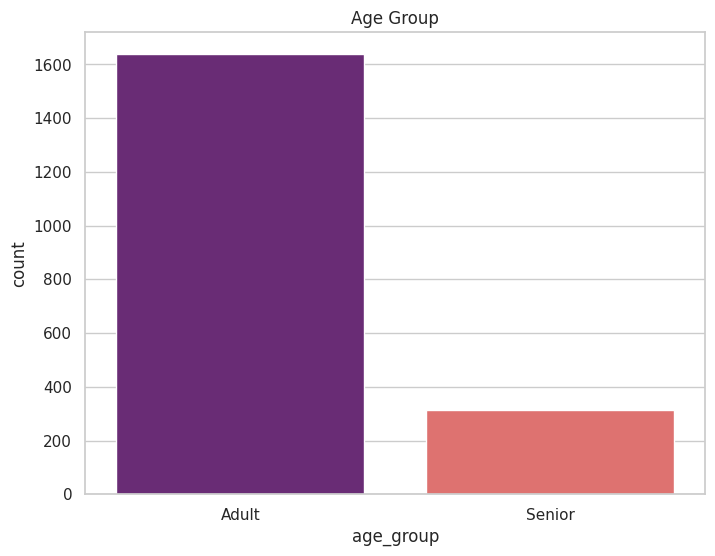

In [178]:
print(train_df['age_group'].value_counts())

plt.figure(figsize=(8,6))
plt.title('Age Group')
sns.countplot(x='age_group', data=train_df, palette='magma')
plt.show()

### Highlighting class imbalance problem

In [179]:
# as we can see adult is significantly respresented in the data
# we have to resample the data

## Demographic Features

### Continuous Features

### Body Mass Index

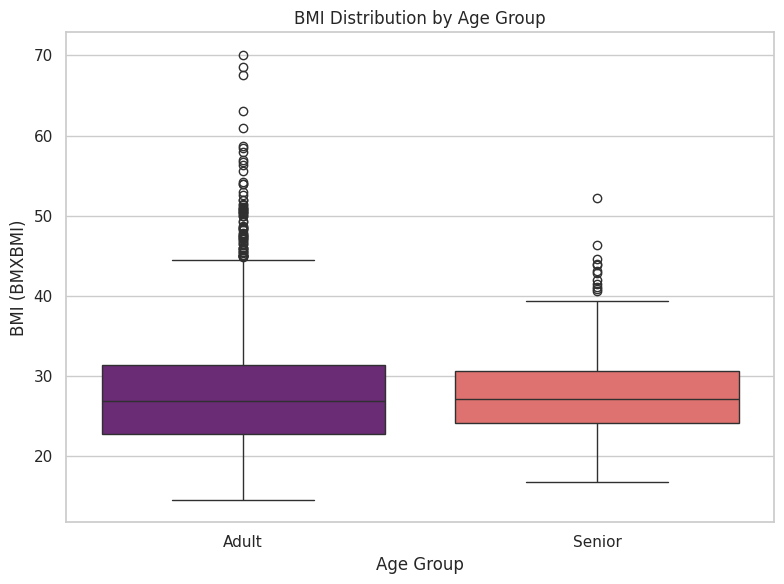

In [180]:
#set style
sns.set(style='whitegrid')
#plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='age_group', y='BMXBMI', data=train_df, palette='magma')
plt.title('BMI Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('BMI (BMXBMI)')
plt.tight_layout()
plt.show()

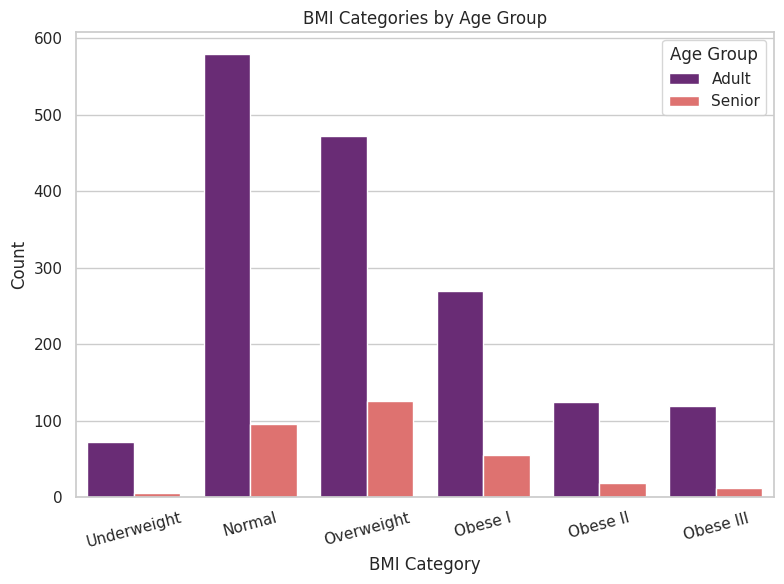

In [181]:
#define BMI bins and labels
bins = [0, 18.5, 25, 30, 35, 40, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
train_df['BMI_bin'] = pd.cut(train_df['BMXBMI'], bins=bins, labels=labels)
#plot grouped bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='BMI_bin', hue='age_group', palette='magma')
plt.title('BMI Categories by Age Group')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### Glucose level

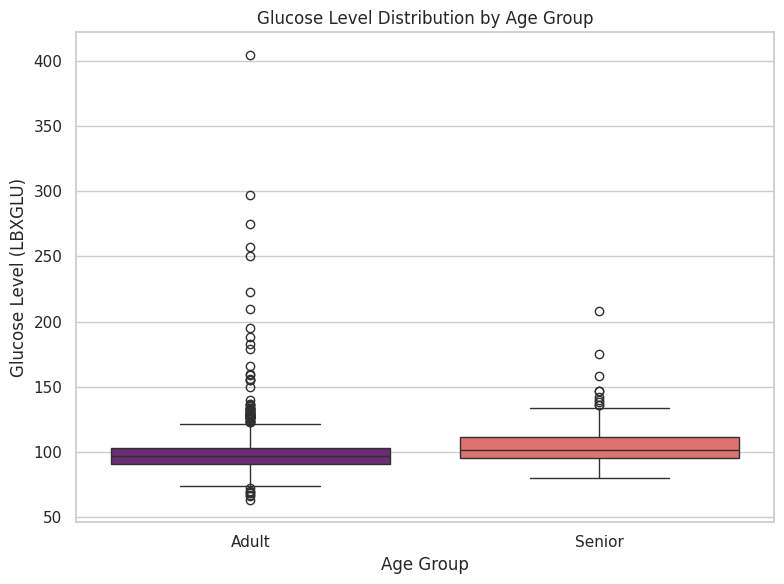

In [182]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_df, x='age_group', y='LBXGLU', palette='magma')
plt.title("Glucose Level Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Glucose Level (LBXGLU)")
plt.tight_layout()
plt.show()

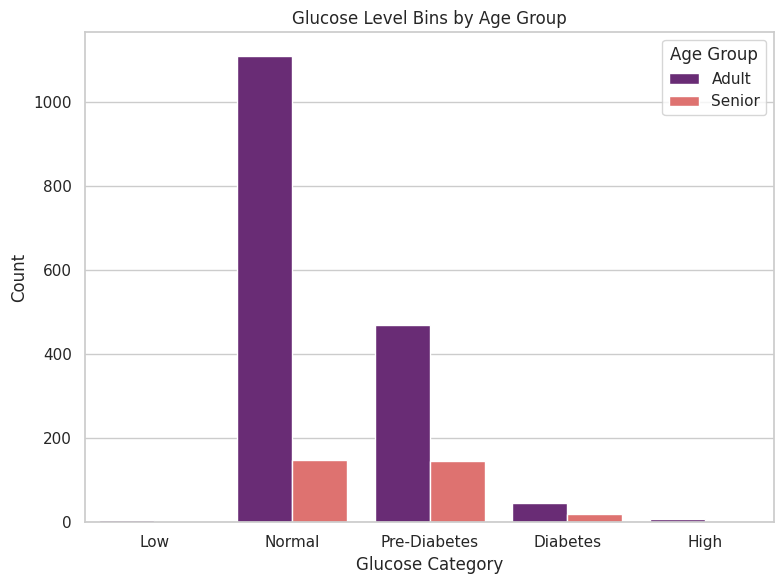

In [183]:
#define Glucose level bins (based on clinical ranges)
glucose_bins = [0, 70, 100, 125, 200, train_df['LBXGLU'].max()]
glucose_labels = ['Low', 'Normal', 'Pre-Diabetes', 'Diabetes', 'High']
train_df['GLU_bin'] = pd.cut(train_df['LBXGLU'], bins=glucose_bins, labels=glucose_labels)
#plot binned bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='GLU_bin', hue='age_group', palette='magma')
plt.title("Glucose Level Bins by Age Group")
plt.xlabel("Glucose Category")
plt.ylabel("Count")
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

### Glucose tolerance (Oral)

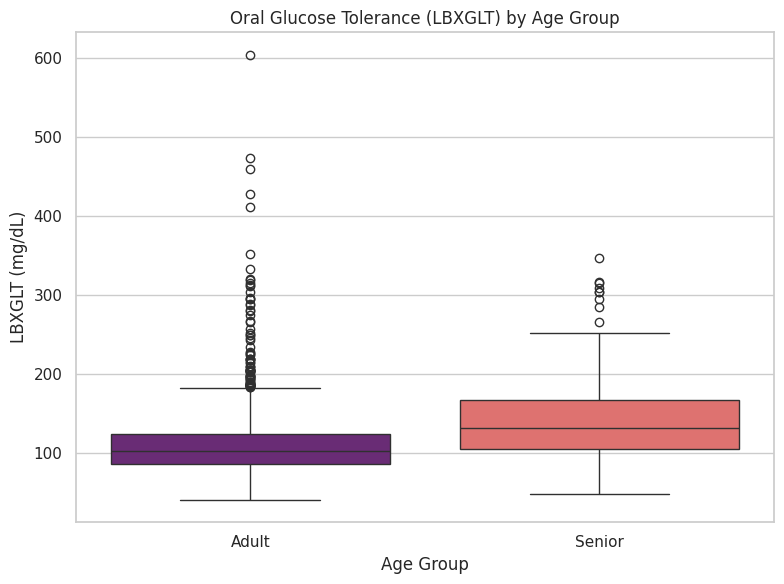

In [184]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_df, x='age_group', y='LBXGLT', palette='magma')
plt.title("Oral Glucose Tolerance (LBXGLT) by Age Group")
plt.xlabel("Age Group")
plt.ylabel("LBXGLT (mg/dL)")
plt.tight_layout()
plt.show()

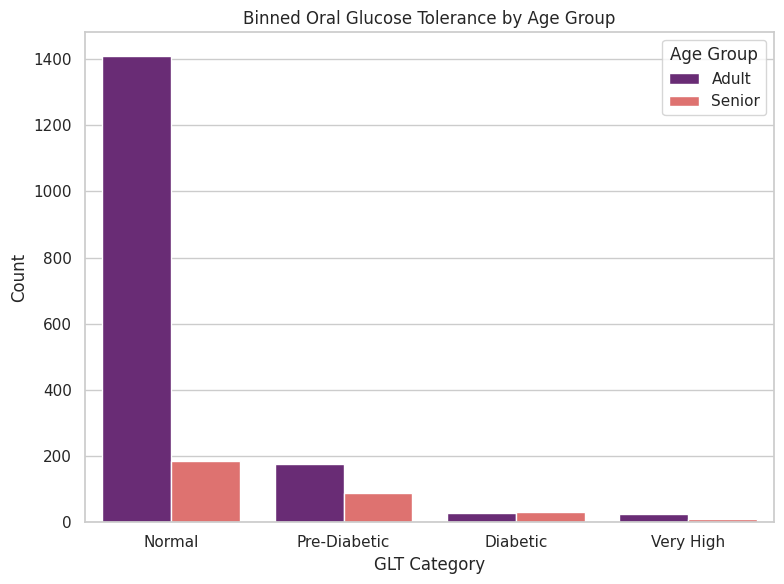

In [185]:
glut_bins = [0, 140, 199, 250, train_df['LBXGLT'].max()]
glut_labels = ['Normal', 'Pre-Diabetic', 'Diabetic', 'Very High']
train_df['GLT_bin'] = pd.cut(train_df['LBXGLT'], bins=glut_bins, labels=glut_labels)

plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='GLT_bin', hue='age_group', palette='magma')
plt.title("Binned Oral Glucose Tolerance by Age Group")
plt.xlabel("GLT Category")
plt.ylabel("Count")
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

### Insulin level

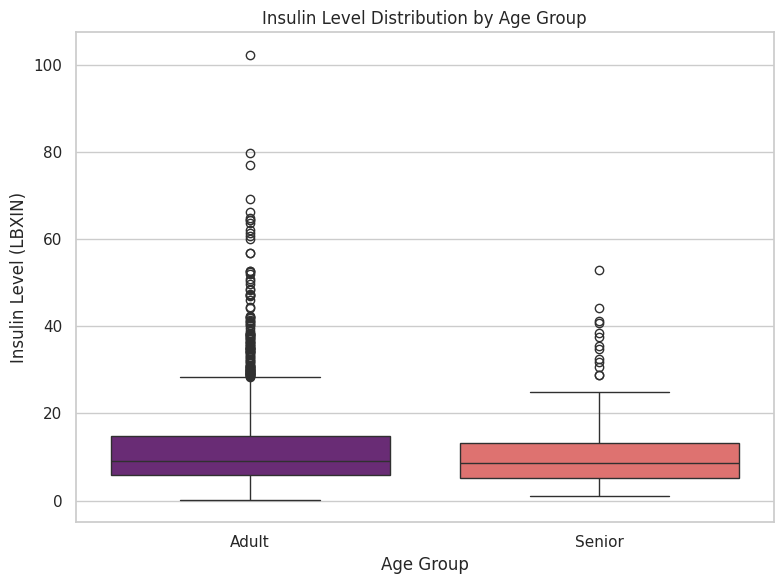

In [186]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_df, x='age_group', y='LBXIN', palette='magma')
plt.title("Insulin Level Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Insulin Level (LBXIN)")
plt.tight_layout()
plt.show()

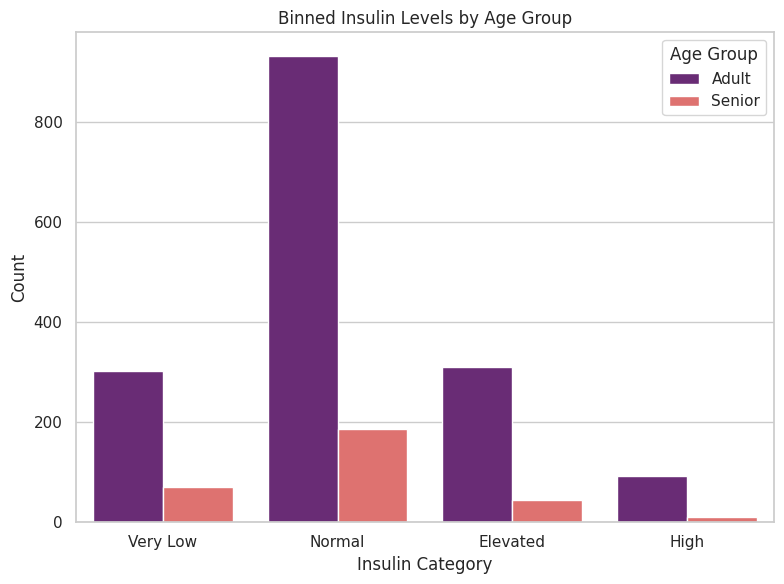

In [187]:
#define bins and labels for LBXIN
insulin_bins = [0, 5, 15, 30, train_df['LBXIN'].max()]
insulin_labels = ['Very Low', 'Normal', 'Elevated', 'High']
#create new binned insulin feature
train_df['INS_bin'] = pd.cut(train_df['LBXIN'], bins=insulin_bins, labels=insulin_labels)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='INS_bin', hue='age_group', palette='magma')
plt.title("Binned Insulin Levels by Age Group")
plt.xlabel("Insulin Category")
plt.ylabel("Count")
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()


## Categorical Features

### Age

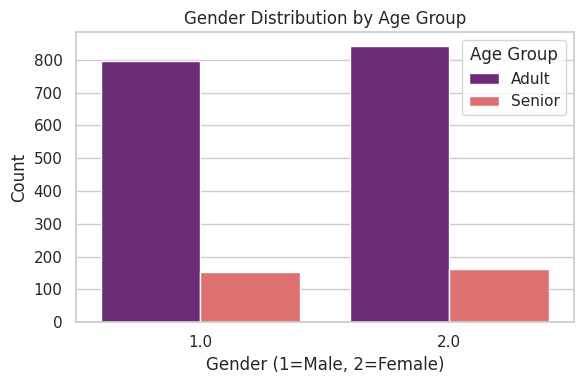

In [188]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='RIAGENDR', hue='age_group', palette='magma')
plt.title("Gender Distribution by Age Group")
plt.xlabel("Gender (1=Male, 2=Female)")
plt.ylabel("Count")
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()



### Physical Activity

In [189]:
train_df['PAQ605'].value_counts()

,count
PAQ605,
2.0,1608
1.0,343
7.0,1


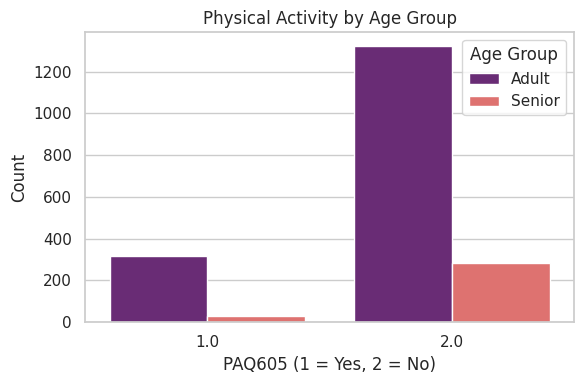

In [190]:
#filter out non-informative responses (only 1))
plot_df = train_df[train_df['PAQ605'].isin([1, 2])]

plt.figure(figsize=(6, 4))
sns.countplot(data=plot_df, x='PAQ605', hue='age_group', palette='magma')
plt.title("Physical Activity by Age Group")
plt.xlabel("PAQ605 (1 = Yes, 2 = No)")
plt.ylabel("Count")
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

### Diabetes questionnaire response

In [191]:
train_df['DIQ010'].value_counts()

,count
DIQ010,
2.0,1884
3.0,49
1.0,19


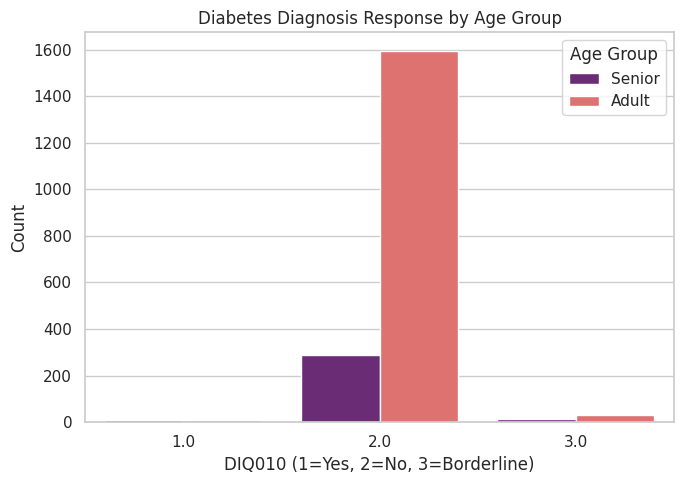

In [192]:
plt.figure(figsize=(7, 5))
sns.countplot(data=train_df, x='DIQ010', hue='age_group', palette='magma')
plt.title("Diabetes Diagnosis Response by Age Group")
plt.xlabel("DIQ010 (1=Yes, 2=No, 3=Borderline)")
plt.ylabel("Count")
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()


# Feature Engineering

## Interaction Features

In [193]:
#ratio of glucose to insulin — proxy for insulin resistance
train_df['GLU_IN_RATIO'] = train_df['LBXGLU'] / (train_df['LBXIN'] + 1e-5)
#combined glucose marker: average of fasting + tolerance
train_df['GLU_MEAN'] = (train_df['LBXGLU'] + train_df['LBXGLT']) / 2

## Binary Flags

In [194]:
#flags for risk indicators
train_df['IS_DIABETIC'] = (train_df['LBXGLU'] > 125).astype(int)
train_df['IS_HIGH_INSULIN'] = (train_df['LBXIN'] > 25).astype(int)

In [195]:
train_df

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group,BMI_bin,GLU_bin,GLT_bin,INS_bin,GLU_IN_RATIO,GLU_MEAN,IS_DIABETIC,IS_HIGH_INSULIN
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult,Obese II,Pre-Diabetes,Pre-Diabetic,Normal,7.377594,130.0,0,0
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult,Normal,Normal,Normal,Very Low,23.116823,84.5,0,0
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult,Normal,Normal,Normal,Normal,14.495090,78.5,0,0
3,1.0,2.0,28.9,104.0,2.0,84.0,16.15,Adult,Overweight,Pre-Diabetes,Normal,Elevated,6.439624,94.0,0,0
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult,Obese II,Pre-Diabetes,Normal,Normal,9.432226,92.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,2.0,2.0,33.5,100.0,2.0,73.0,6.53,Adult,Obese I,Normal,Normal,Normal,15.313912,86.5,0,0
1962,1.0,2.0,30.0,93.0,2.0,208.0,13.02,Adult,Overweight,Normal,Diabetic,Normal,7.142852,150.5,0,0
1963,1.0,2.0,23.7,103.0,2.0,124.0,21.41,Adult,Normal,Pre-Diabetes,Normal,Elevated,4.810834,113.5,0,0
1964,2.0,2.0,27.4,90.0,2.0,108.0,4.99,Adult,Overweight,Normal,Normal,Very Low,18.036036,99.0,0,0


# Outlier Detection and Removal

In [196]:
train_df.columns

Index(['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN',
       'age_group', 'BMI_bin', 'GLU_bin', 'GLT_bin', 'INS_bin', 'GLU_IN_RATIO',
       'GLU_MEAN', 'IS_DIABETIC', 'IS_HIGH_INSULIN'],
      dtype='object')

In [197]:
train_df.drop(columns = ['BMI_bin', 'GLU_bin', 'GLT_bin', 'INS_bin'], inplace=True)

In [198]:
train_df.columns

Index(['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN',
       'age_group', 'GLU_IN_RATIO', 'GLU_MEAN', 'IS_DIABETIC',
       'IS_HIGH_INSULIN'],
      dtype='object')

In [199]:
numeric_cols = [
    'BMXBMI',       # Body Mass Index
    'LBXGLU',       # Fasting Glucose
    'LBXGLT',       # Oral Glucose Tolerance
    'LBXIN',        # Insulin
    'GLU_IN_RATIO', # Engineered
    'GLU_MEAN'      # Engineered
]

In [200]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

In [201]:
train_df_cleaned = remove_outliers_iqr(train_df, numeric_cols)

In [202]:
print(f"Before: {train_df.shape[0]} rows")
print(f"After:  {train_df_cleaned.shape[0]} rows")

Before: 1952 rows
After:  1527 rows


# Data Splitting and Resampling

## Initial Train-Test Split

In [203]:
train_df_cleaned['age_group'] = train_df_cleaned['age_group'].map({'Adult': 0, 'Senior': 1})

In [204]:
#features and target
X = train_df_cleaned.drop(columns=['age_group'])
y = train_df_cleaned['age_group']


In [205]:
# Train-validation split (80–20)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [206]:
y_train.value_counts(normalize=True)

,proportion
age_group,
0,0.858313
1,0.141687


In [207]:
# seniors are very few (we will apply SMOTE for class balancing)

## SMOTE

### Applied to training set only to balance classes

In [208]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [209]:
#apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the class distribution in the training set.
#this helps address the issue of class imbalance by generating synthetic samples for the minority class,
#improving the model’s ability to learn patterns related to defaults.

### Before/after class distribution

In [210]:
#check original class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts())


Class distribution before SMOTE:
age_group
0    1048
1     173
Name: count, dtype: int64

Class distribution after SMOTE:
age_group
0    1048
1    1048
Name: count, dtype: int64


In [211]:
#Before applying SMOTE,
 ##the dataset had an imbalanced distribution of classes, which can cause models to be biased towards the majority class.
#After applying SMOTE,
 ##the training data becomes balanced by synthetically generating new samples for the minority class.
 ##This helps improve the model’s ability to detect minority class (i.e., defaults) more effectively.

# Model Building and Evaluation

## Models Used

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

## Metrics Used

In [213]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score

#fitting the scaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)

#define all models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=8, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', scale_pos_weight=(y_train_resampled == 0).sum() / (y_train_resampled == 1).sum(), random_state=42),
    "LightGBM": LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
}
#evaluation Loop
for name, model in models.items():
    print(f"Evaluating: {name}")

    #determine training data based on model type
    if name in ['Logistic Regression', 'SVM (RBF)']:
        X_train_input = X_train_scaled
        X_val_input = X_val_scaled
    else:
        X_train_input = X_train_resampled # Use resampled data for training
        X_val_input = X_val

    #fit the model on the training data
    model.fit(X_train_input, y_train_resampled)

    #predict
    y_val_pred = model.predict(X_val_input)

    #confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)

    #classification Report
    print("Classification Report:")
    print(classification_report(y_val, y_val_pred, target_names=['Adult', 'Senior']))

    #f1 Score
    f1 = f1_score(y_val, y_val_pred)
    print(f"F1 Score: {f1:.4f}")
    print("=" * 60)

Evaluating: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

       Adult       0.94      0.71      0.81       263
      Senior       0.29      0.72      0.41        43

    accuracy                           0.71       306
   macro avg       0.61      0.71      0.61       306
weighted avg       0.85      0.71      0.75       306

F1 Score: 0.4106
Evaluating: Decision Tree
Classification Report:
              precision    recall  f1-score   support

       Adult       0.89      0.77      0.83       263
      Senior       0.24      0.44      0.31        43

    accuracy                           0.73       306
   macro avg       0.57      0.61      0.57       306
weighted avg       0.80      0.73      0.76       306

F1 Score: 0.3115
Evaluating: Random Forest
Classification Report:
              precision    recall  f1-score   support

       Adult       0.92      0.85      0.88       263
      Senior       0.37      0.53      0.43       

In [214]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List of models with names
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=8, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', scale_pos_weight=(y_train_resampled == 0).sum() / (y_train_resampled == 1).sum(), random_state=42),
    "LightGBM": LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
}

# Store results
cv_results = {}

# Run CV for each model
for name, model in models.items():
    try:
        scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=cv, scoring='f1')
        cv_results[name] = scores.mean()
        print(f"{name}: Mean CV F1 Score = {scores.mean():.4f}")
    except Exception as e:
        print(f"{name}: Error during CV - {e}")


Logistic Regression: Mean CV F1 Score = 0.6606
Decision Tree: Mean CV F1 Score = 0.7569
Random Forest: Mean CV F1 Score = 0.8508
XGBoost: Mean CV F1 Score = 0.8885
LightGBM: Mean CV F1 Score = 0.8816
SVM (RBF): Mean CV F1 Score = 0.6438


## Results Visualization

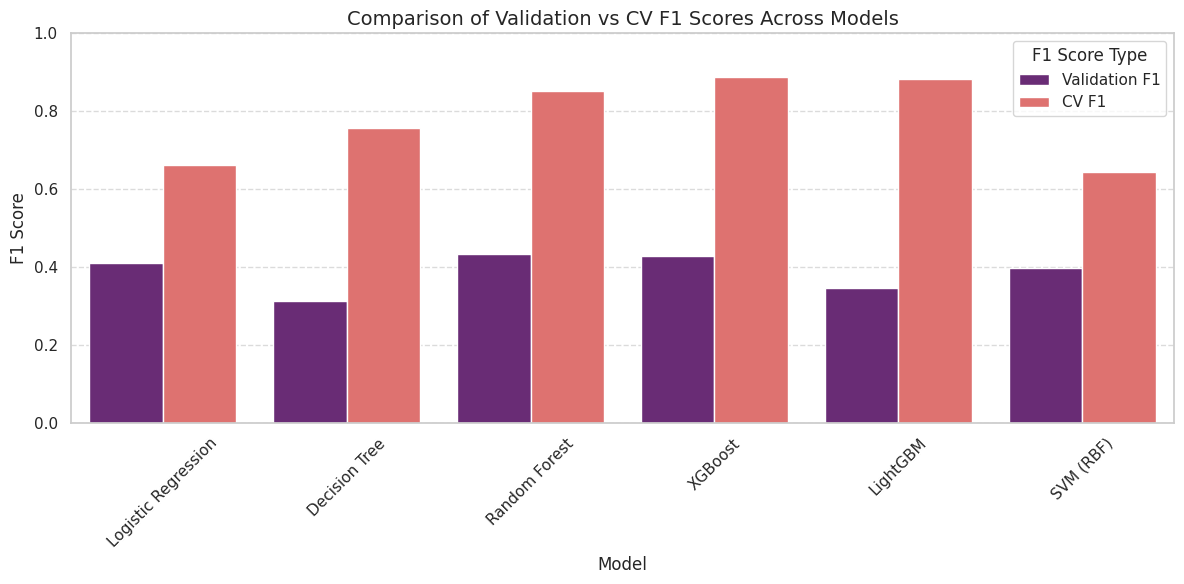

In [215]:
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "LightGBM", "SVM (RBF)"]
val_f1_scores = [0.4106, 0.3115, 0.4340, 0.4286, 0.3457, 0.3973]
cv_f1_scores = [0.6606, 0.7569, 0.8508, 0.8885, 0.8816, 0.6438]

#create DataFrame for grouped bar plot
plot_df = pd.DataFrame({
    "Model": model_names * 2,
    "Score Type": ["Validation F1"] * 6 + ["CV F1"] * 6,
    "F1 Score": val_f1_scores + cv_f1_scores
})


plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x="Model", y="F1 Score", hue="Score Type", palette="magma")

#add labels and formatting
plt.title("Comparison of Validation vs CV F1 Scores Across Models", fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="F1 Score Type")
plt.tight_layout()

plt.show()


In [216]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(xgb, param_grid, scoring='f1', cv=3, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


In [217]:
final_xgb = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(y_train_resampled == 0).sum() / (y_train_resampled == 1).sum(),
    random_state=42
)

final_xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

# Model Explainability

## SHAP Analysis

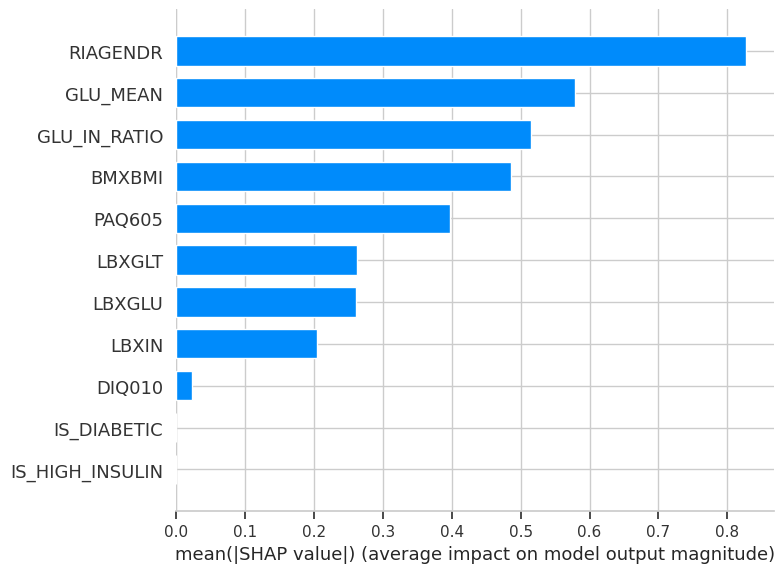

In [218]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(final_xgb)
shap_values = explainer.shap_values(X_train_resampled)

# Bar chart of average feature importance
shap.summary_plot(shap_values, X_train_resampled, plot_type="bar")


# Threshold Optimization

In [219]:
import numpy as np
from sklearn.metrics import f1_score, precision_recall_curve

# Predict probabilities on validation set
y_val_probs = final_xgb.predict_proba(X_val)[:, 1]

# Search for best threshold using precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_val, y_val_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)

# Find the best threshold for highest F1
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1 = np.max(f1_scores)

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1 Score: {best_f1:.4f}")


Best Threshold: 0.53
Best F1 Score: 0.4773


In [220]:
# Predict using best threshold
y_val_pred_thresh = (y_val_probs >= best_threshold).astype(int)

# Evaluate new predictions
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_thresh))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_thresh))


Confusion Matrix:
[[239  24]
 [ 22  21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       263
           1       0.47      0.49      0.48        43

    accuracy                           0.85       306
   macro avg       0.69      0.70      0.69       306
weighted avg       0.85      0.85      0.85       306



# Test Data Processing

## Reading test dataset

In [221]:
test_df = pd.read_csv('/content/Test_Data.csv')

In [222]:
test_df

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,77017.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12
...,...,...,...,...,...,...,...,...
307,74150.0,2.0,2.0,21.9,82.0,2.0,82.0,2.54
308,82550.0,2.0,1.0,33.3,95.0,2.0,77.0,6.36
309,77835.0,2.0,2.0,41.5,91.0,2.0,149.0,15.52
310,79281.0,2.0,2.0,22.5,82.0,2.0,93.0,1.39


## Applying same preprocessing and feature engineering steps



In [223]:
#ratio of glucose to insulin — proxy for insulin resistance
test_df['GLU_IN_RATIO'] = test_df['LBXGLU'] / (test_df['LBXIN'] + 1e-5)
#combined glucose marker: average of fasting + tolerance
test_df['GLU_MEAN'] = (test_df['LBXGLU'] + test_df['LBXGLT']) / 2

In [224]:
#flags for risk indicators
test_df['IS_DIABETIC'] = (test_df['LBXGLU'] > 125).astype(int)
test_df['IS_HIGH_INSULIN'] = (test_df['LBXIN'] > 25).astype(int)

In [225]:
test_df.isnull().sum()

,0
SEQN,2
RIAGENDR,2
PAQ605,1
BMXBMI,1
LBXGLU,1
DIQ010,1
LBXGLT,2
LBXIN,1
GLU_IN_RATIO,2
GLU_MEAN,3


In [226]:
for col in test_df.columns:
    if test_df[col].dtype != 'object':
        test_df[col].fillna(test_df[col].median(), inplace=True)

In [227]:
test_df.isnull().sum()

,0
SEQN,0
RIAGENDR,0
PAQ605,0
BMXBMI,0
LBXGLU,0
DIQ010,0
LBXGLT,0
LBXIN,0
GLU_IN_RATIO,0
GLU_MEAN,0


In [228]:
X_train_resampled.columns

Index(['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN',
       'GLU_IN_RATIO', 'GLU_MEAN', 'IS_DIABETIC', 'IS_HIGH_INSULIN'],
      dtype='object')

In [229]:
test_df = test_df[X_train_resampled.columns]

In [230]:
test_df

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,GLU_IN_RATIO,GLU_MEAN,IS_DIABETIC,IS_HIGH_INSULIN
0,1.0,1.0,32.2,96.0,2.0,135.0,15.11,6.353404,115.5,0,0
1,2.0,2.0,26.3,100.0,2.0,141.0,15.26,6.553076,120.5,0,0
2,1.0,2.0,28.6,107.0,2.0,136.0,8.82,12.131506,121.5,0,0
3,2.0,1.0,22.1,93.0,2.0,111.0,12.13,7.666935,102.0,0,0
4,1.0,1.0,24.7,91.0,2.0,105.0,3.12,29.166573,98.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
307,2.0,2.0,21.9,82.0,2.0,82.0,2.54,32.283337,82.0,0,0
308,2.0,1.0,33.3,95.0,2.0,77.0,6.36,14.937083,86.0,0,0
309,2.0,2.0,41.5,91.0,2.0,149.0,15.52,5.863398,120.0,0,0
310,2.0,2.0,22.5,82.0,2.0,93.0,1.39,58.992381,87.5,0,0


# Final Prediction

In [231]:
# Predict probabilities on test set
test_probs = final_xgb.predict_proba(test_df)[:, 1]

# Apply best threshold
test_preds_thresh = (test_probs >= best_threshold).astype(int)

# Save final submission
submission_thresh = pd.DataFrame({'age_group': test_preds_thresh})
submission_thresh.to_csv("submission.csv", index=False)


In [232]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>